# Finding the best location for a coffee shop in Bangalore

## Business Problem
The objective of this capstone project is to analyze and select the best neighborhood in the city of Bangalore to open a new coffee shop. Using data science methodology and machine learning techniques like clustering, this project will aim to provide a solution to the question: Which neighborhood in the city of Bangalore would a stakeholder of a coffee shop look to open a business. Target audience of the project will be all those locals, outsiders, tourist who are in Bangalore and don't start there day without a coffee. From yougsters to senior citizens who love coffee comes under the target audience.

## Data
For this project we need the following data:
- Bangalore Coffee shops data that contains list Locality, name along with their latitude and longitude.
  - Data source : Bangalore Zomato kaggle dataset
  - Description : This data set contains the required information. And we will use this data set to explore various locality of    city.

- Nearby places in each locality of Bangalore city.
  - Data source : Foursquare API
  - Description : By using this api we will get all the venues in each neighborhood.

## Approach
- Clean annd process our zomato dataset
- using foursquare API get nearby venues
- try to figure out which locality will have maximum potential traffic


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

In [9]:
df = pd.read_csv("C:\zomato.csv")

In [10]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Cleaning 
Removing unwanted columns and rows

In [11]:
df.drop(['url','book_table','phone','dish_liked','approx_cost(for two people)','reviews_list','menu_item'],axis =1, inplace = True)

In [12]:
df.head()

,address,name,online_order,rate,votes,location,rest_type,cuisines,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari


In [13]:
df.drop(['online_order','listed_in(type)'],axis =1,inplace = True)

In [14]:
df.isna().sum()

address               0
name                  0
rate               7775
votes                 0
location             21
rest_type           227
cuisines             45
listed_in(city)       0
dtype: int64

In [15]:
df = df[df.rate.isna() == False]
df= df[df.cuisines.isna()==False]
df = df[df.location.isna() == False]
df = df[df.rest_type.isna() == False]

In [16]:
df.isna().sum()

address            0
name               0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
listed_in(city)    0
dtype: int64

In [17]:
df.name.value_counts().head()

Cafe Coffee Day      89
Onesta               85
Empire Restaurant    71
Kanti Sweets         68
Just Bake            68
Name: name, dtype: int64

## Visualization


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Name vs Number of Restaurant')

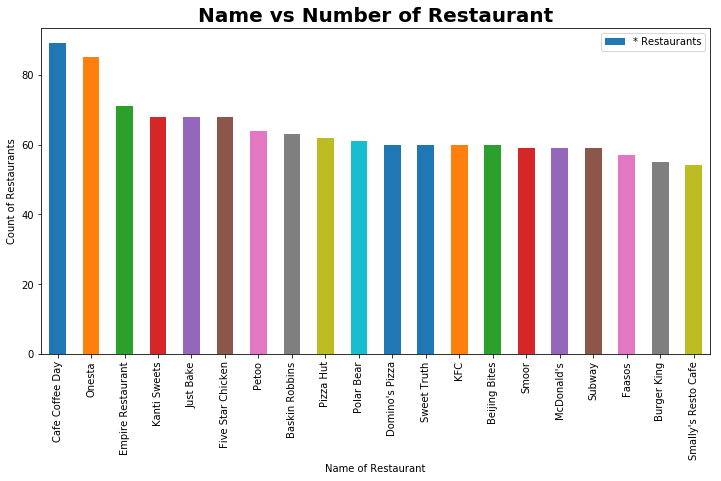

In [19]:
plt.figure(figsize = (12,6))
ax = df.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

## Dataset of only Coffee Shops

In [20]:
bgr_data = df[df['name'].str.contains('Coffee',regex = False)]

In [21]:
bgr_data.head()

,address,name,rate,votes,location,rest_type,cuisines,listed_in(city)
12,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,4.2/5,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",Banashankari
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,3.6/5,28,Banashankari,Cafe,"Cafe, Fast Food",Banashankari
26,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,3.8/5,75,Banashankari,"Cafe, Quick Bites","Cafe, South Indian",Banashankari
120,"4001/4002, Annapoorneshwari Plaza, Near Seetha...",Bengaluru Coffee House,4.1/5,201,Banashankari,Quick Bites,"South Indian, North Indian, Chinese, Street Food",Banashankari
122,"10th Main, Hanumanthanagar, 50 Feet Road, Phas...",Coffee Bytes,3.1/5,6,Banashankari,Quick Bites,"Fast Food, South Indian",Banashankari


In [22]:
bgr_data['location'].value_counts()[:10]


MG Road                  31
Jayanagar                30
Banashankari             26
Indiranagar              25
Koramangala 4th Block    20
Church Street            20
BTM                      19
Koramangala 5th Block    18
Whitefield               14
Koramangala 8th Block    14
Name: location, dtype: int64

## Which location has maximum number of coffee shops

Text(0.5, 1.0, 'Location')

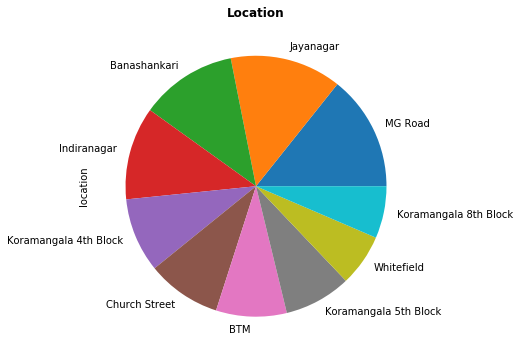

In [23]:
plt.figure(figsize=(12,6))
bgr_data['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location',weight ='bold')



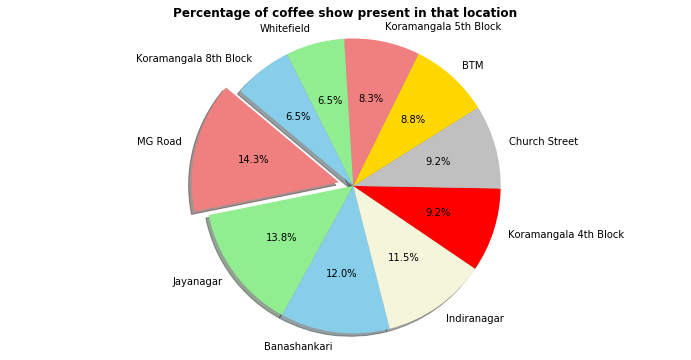

In [24]:
plt.figure(figsize=(12,6))
names = bgr_data['location'].value_counts()[:10].index
values = bgr_data['location'].value_counts()[:10].values
colors = ['lightcoral','lightgreen','skyblue','beige','red','silver','gold']

explode = (0.1, 0, 0, 0,0,0,0,0,0,0)

plt.pie(values, explode=explode,labels=names,colors = colors,autopct = '%1.1f%%',shadow = True, startangle= 140)

plt.axis('equal')
plt.title("Percentage of coffee show present in that location", weight = 'bold')
plt.show()





## Foursquare API

In [25]:
CLIENT_ID = 'L5NW1SGYGIBKPOUVVL0PGOLIRR5KV1KUXPARVD1NJHG3L0MU' # your Foursquare ID
CLIENT_SECRET = 'IHYE4RHQHLYWDIQLT2L2L0C4NYJ4L532NHO0OWCWOWJRDF3W' # your Foursquare Secret
VERSION = '20201122'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L5NW1SGYGIBKPOUVVL0PGOLIRR5KV1KUXPARVD1NJHG3L0MU
CLIENT_SECRET:IHYE4RHQHLYWDIQLT2L2L0C4NYJ4L532NHO0OWCWOWJRDF3W


## Name and Address of all coffee shops in Bangalore with longitude and latitude

In [26]:
from geopy.geocoders import Nominatim

address = ' Bangalore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

12.9791198 77.5912997


In [27]:
search_query = 'coffee '
radius = 50000
print(search_query + ' .... OK!')

coffee  .... OK!


In [28]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6103f936178f8732a588908f'},
 'response': {'venues': [{'id': '4b759767f964a520b4162ee3',
    'name': 'Coffee Day Square',
    'location': {'address': '#23/2, Near UB City',
     'crossStreet': 'Near UB City',
     'lat': 12.97167103862426,
     'lng': 77.59413157765854,
     'labeledLatLngs': [{'label': 'display',
       'lat': 12.97167103862426,
       'lng': 77.59413157765854}],
     'distance': 884,
     'postalCode': '560001',
     'cc': 'IN',
     'city': 'Bangalore',
     'state': 'Karnātaka',
     'country': 'India',
     'formattedAddress': ['#23/2, Near UB City (Near UB City)',
      'Bangalore 560001',
      'Karnātaka',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v

## Preprocessing Dataframe

In [29]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b759767f964a520b4162ee3,"#23/2, Near UB City",IN,Bangalore,India,Near UB City,884,"[#23/2, Near UB City (Near UB City), Bangalore...","[{'label': 'display', 'lat': 12.97167103862426...",12.971671,77.594132,560001,Karnātaka,Coffee Day Square,v-1627650358
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c4c019f9e6dbe9a9e06db0c,Sigma Mall,IN,Bangalore,India,Cunningham Rd,994,"[Sigma Mall (Cunningham Rd), Bangalore 560052,...","[{'label': 'display', 'lat': 12.98744844901247...",12.987448,77.594606,560052,Karnātaka,Cafe Coffee Day,v-1627650358
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c80d6e8d34ca1438f5b1c80,"Prestige Feroze Building,No 74,",IN,Bangalore,India,"Ground Floor,Cunningham Road",1146,"[Prestige Feroze Building,No 74, (Ground Floor...","[{'label': 'display', 'lat': 12.98930496155035...",12.989305,77.592883,560052,Karnātaka,Cafe Coffee Day,v-1627650358
3,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4c975d63f244b1f7b8d03b1d,"4/1, Walton Road Circle",IN,Bangalore,India,Lavelle Rd,1125,"[4/1, Walton Road Circle (Lavelle Rd), Bangalo...","[{'label': 'display', 'lat': 12.97130289410456...",12.971303,77.597885,560001,Karnātaka,Cafe Coffee Day,v-1627650358
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b76779cf964a520864d2ee3,"Unit 37-38, Shrungar Shopping Center",IN,Bangalore,India,Church St,1602,"[Unit 37-38, Shrungar Shopping Center (Church ...","[{'label': 'display', 'lat': 12.97479787420390...",12.974798,77.605394,560001,Karnātaka,Indian Coffee House,v-1627650358


In [30]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Coffee Day Square,Coffee Shop,"#23/2, Near UB City",IN,Bangalore,India,Near UB City,884,"[#23/2, Near UB City (Near UB City), Bangalore...","[{'label': 'display', 'lat': 12.97167103862426...",12.971671,77.594132,560001,Karnātaka,4b759767f964a520b4162ee3
1,Cafe Coffee Day,Coffee Shop,Sigma Mall,IN,Bangalore,India,Cunningham Rd,994,"[Sigma Mall (Cunningham Rd), Bangalore 560052,...","[{'label': 'display', 'lat': 12.98744844901247...",12.987448,77.594606,560052,Karnātaka,4c4c019f9e6dbe9a9e06db0c
2,Cafe Coffee Day,Coffee Shop,"Prestige Feroze Building,No 74,",IN,Bangalore,India,"Ground Floor,Cunningham Road",1146,"[Prestige Feroze Building,No 74, (Ground Floor...","[{'label': 'display', 'lat': 12.98930496155035...",12.989305,77.592883,560052,Karnātaka,4c80d6e8d34ca1438f5b1c80
3,Cafe Coffee Day,Café,"4/1, Walton Road Circle",IN,Bangalore,India,Lavelle Rd,1125,"[4/1, Walton Road Circle (Lavelle Rd), Bangalo...","[{'label': 'display', 'lat': 12.97130289410456...",12.971303,77.597885,560001,Karnātaka,4c975d63f244b1f7b8d03b1d
4,Indian Coffee House,Coffee Shop,"Unit 37-38, Shrungar Shopping Center",IN,Bangalore,India,Church St,1602,"[Unit 37-38, Shrungar Shopping Center (Church ...","[{'label': 'display', 'lat': 12.97479787420390...",12.974798,77.605394,560001,Karnātaka,4b76779cf964a520864d2ee3


## Getting Nearby Venues

In [31]:
def getNearbyVenues(names, latitudes, longitudes,crossStreet, radius=500):
    
    venues_list=[]
    for name, lat, lng,cs in zip(names, latitudes, longitudes,crossStreet):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            cs,
            
            v['venue']['name'], 
            
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'cross Street'  ,         
                            
                  'Venue',
                          
                             
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



In [32]:
newbgr_data = getNearbyVenues(names =dataframe_filtered['name'],latitudes=dataframe_filtered['lat'],longitudes=dataframe_filtered['lng'],crossStreet =dataframe_filtered['crossStreet']  )

Coffee Day Square
Cafe Coffee Day
Cafe Coffee Day
Cafe Coffee Day
Indian Coffee House
Cafe Coffee Day
Costa Coffee
Cafe Coffee Day
Cafe Coffee Day- The Lounge
Cafe Coffee Day
Coffee Board
Cafe Coffee Day
Cafe Coffee Day
Sri Raghavrndra Prasanna Coffee Club
Cafe Coffee Day
Cafe Coffee Day
Cafe Coffee Day
Brahmins Coffee Bar
Costa Coffee
Cafe Coffee Day
1948 A.D Coffee Shop
Third Wave Coffee Roasters
Idli Dosa Coffee (IDC)
cafe coffee day
cafe coffee day
Cafe Coffee Day, Sampige Road
Café Coffee Day - Lounge
Cafe Coffee Day
Cafe Coffee Day
Cafe Coffee Day


In [33]:
print(newbgr_data.shape)
newbgr_data.head()

(681, 8)


,Name,Neighborhood Latitude,Neighborhood Longitude,cross Street,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Coffee Day Square,12.971671,77.594132,Near UB City,JW Marriott Hotel Bengaluru,12.972362,77.595051,Hotel
1,Coffee Day Square,12.971671,77.594132,Near UB City,UB City,12.971709,77.595905,Shopping Mall
2,Coffee Day Square,12.971671,77.594132,Near UB City,Café Noir,12.971995,77.596001,French Restaurant
3,Coffee Day Square,12.971671,77.594132,Near UB City,J W Kitchen,12.972410,77.594592,Asian Restaurant
4,Coffee Day Square,12.971671,77.594132,Near UB City,Spice Terrace,12.972254,77.595200,Lounge


In [34]:
newbgr_data.groupby('Name').count()



,Neighborhood Latitude,Neighborhood Longitude,cross Street,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,,
1948 A.D Coffee Shop,14,14,0,14,14,14,14
Brahmins Coffee Bar,10,10,10,10,10,10,10
Cafe Coffee Day,330,330,298,330,330,330,330
"Cafe Coffee Day, Sampige Road",16,16,16,16,16,16,16
Cafe Coffee Day- The Lounge,30,30,30,30,30,30,30
Café Coffee Day - Lounge,19,19,19,19,19,19,19
Coffee Board,21,21,0,21,21,21,21
Coffee Day Square,30,30,30,30,30,30,30
Costa Coffee,53,53,53,53,53,53,53


In [35]:
print('There are {} uniques cross Street.'.format(len(newbgr_data['cross Street'].unique())))

There are 24 uniques cross Street.


## Analyze each Neighborhood

In [36]:
bgr_onehot = pd.get_dummies(newbgr_data[['Name']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bgr_onehot['Location'] = newbgr_data['Venue']
# move neighborhood column to the first column
fixed_columns = [bgr_onehot.columns[-1]] + list(bgr_onehot.columns[:-1])
bgr_onehot = bgr_onehot[fixed_columns]

bgr_onehot.head()

,Location,1948 A.D Coffee Shop,Brahmins Coffee Bar,Cafe Coffee Day,"Cafe Coffee Day, Sampige Road",Cafe Coffee Day- The Lounge,Café Coffee Day - Lounge,Coffee Board,Coffee Day Square,Costa Coffee,Idli Dosa Coffee (IDC),Indian Coffee House,Sri Raghavrndra Prasanna Coffee Club,Third Wave Coffee Roasters,cafe coffee day
0,JW Marriott Hotel Bengaluru,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,UB City,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Café Noir,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,J W Kitchen,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Spice Terrace,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [37]:
newbgr_data['Venue'].value_counts()

Cafe Coffee Day                   28
Corner House                       9
Subway                             8
Green Onion Chinese Restaurant     7
Chung Wah                          7
Nagarjuna                          7
Khan Saheb                         7
Art of Delight                     7
Communiti                          7
Hotel Ballal Residency             7
Starbucks                          6
Karavalli                          6
Fitness First                      6
Smoke House Deli                   5
Pizza Stop                         5
Barista, Cunningham Road           5
The Banjara                        5
Arbor Brewing Company              5
The Biere Club                     5
Shezan                             5
Secret Garden Cafe                 5
Meghanas Biriyani                  5
Smally's RestoCafe                 5
Banjara's Melting Pot              5
The Permit Room                    5
Margarita Lounge Bar               5
Hammered                           5
S

In [38]:
bgr_grouped = bgr_onehot.groupby('Location').mean().reset_index()
bgr_grouped

,Location,1948 A.D Coffee Shop,Brahmins Coffee Bar,Cafe Coffee Day,"Cafe Coffee Day, Sampige Road",Cafe Coffee Day- The Lounge,Café Coffee Day - Lounge,Coffee Board,Coffee Day Square,Costa Coffee,Idli Dosa Coffee (IDC),Indian Coffee House,Sri Raghavrndra Prasanna Coffee Club,Third Wave Coffee Roasters,cafe coffee day
0,1498 AD,0.5,0.0,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,1947,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,1Q1 BLR,0.0,0.0,0.500000,0.0,0.000000,0.0,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,Adyar Ananda Bhavan,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
4,Affinity Gym,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
5,Airlines Hotel,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.500000,0.000000
6,Al Bek,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
7,Alba,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.500000
8,Alliance Française,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
9,Ammas Pastries,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [39]:
num_top_venues = 5

for hood in bgr_grouped['Location']:
    print("----"+hood+"----")
    temp = bgr_grouped[bgr_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1498 AD----
                           venue  freq
0           1948 A.D Coffee Shop   0.5
1                Cafe Coffee Day   0.5
2            Brahmins Coffee Bar   0.0
3  Cafe Coffee Day, Sampige Road   0.0
4    Cafe Coffee Day- The Lounge   0.0


----1947----
                           venue  freq
0  Cafe Coffee Day, Sampige Road   1.0
1           1948 A.D Coffee Shop   0.0
2            Brahmins Coffee Bar   0.0
3                Cafe Coffee Day   0.0
4    Cafe Coffee Day- The Lounge   0.0


----1Q1 BLR----
                           venue  freq
0                Cafe Coffee Day   0.5
1                   Coffee Board   0.5
2           1948 A.D Coffee Shop   0.0
3            Brahmins Coffee Bar   0.0
4  Cafe Coffee Day, Sampige Road   0.0


----Adyar Ananda Bhavan----
                           venue  freq
0                   Costa Coffee   1.0
1           1948 A.D Coffee Shop   0.0
2            Brahmins Coffee Bar   0.0
3                Cafe Coffee Day   0.0
4  Cafe Coffee Day, Samp

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Location'] = bgr_grouped['Location']

for ind in np.arange(bgr_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bgr_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1498 AD,Cafe Coffee Day,1948 A.D Coffee Shop,cafe coffee day,Third Wave Coffee Roasters,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Day Square,Coffee Board
1,1947,"Cafe Coffee Day, Sampige Road",cafe coffee day,Third Wave Coffee Roasters,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Day Square,Coffee Board,Café Coffee Day - Lounge
2,1Q1 BLR,Coffee Board,Cafe Coffee Day,cafe coffee day,Third Wave Coffee Roasters,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Day Square,Café Coffee Day - Lounge
3,Adyar Ananda Bhavan,Costa Coffee,cafe coffee day,Third Wave Coffee Roasters,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Coffee Day Square,Coffee Board,Café Coffee Day - Lounge,Cafe Coffee Day- The Lounge
4,Affinity Gym,Café Coffee Day - Lounge,cafe coffee day,Third Wave Coffee Roasters,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Day Square,Coffee Board,Cafe Coffee Day- The Lounge


## Clustering Neighborhood

In [42]:
kclusters = 5
bgr_cluster = bgr_grouped.drop('Location',1)

kmeans = KMeans(n_clusters = kclusters,random_state=0).fit(bgr_cluster)
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 4, 0, 1, 0, 1, 0])

In [43]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bgr_final = newbgr_data
bgr_final = bgr_final.join(neighborhoods_venues_sorted.set_index('Location'), on='Venue')

bgr_final.head()


,Name,Neighborhood Latitude,Neighborhood Longitude,cross Street,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Coffee Day Square,12.971671,77.594132,Near UB City,JW Marriott Hotel Bengaluru,12.972362,77.595051,Hotel,0,cafe coffee day,Third Wave Coffee Roasters,Coffee Day Square,Cafe Coffee Day,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Board,Café Coffee Day - Lounge
1,Coffee Day Square,12.971671,77.594132,Near UB City,UB City,12.971709,77.595905,Shopping Mall,0,cafe coffee day,Third Wave Coffee Roasters,Coffee Day Square,Cafe Coffee Day,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Board,Café Coffee Day - Lounge
2,Coffee Day Square,12.971671,77.594132,Near UB City,Café Noir,12.971995,77.596001,French Restaurant,0,cafe coffee day,Third Wave Coffee Roasters,Coffee Day Square,Cafe Coffee Day,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Board,Café Coffee Day - Lounge
3,Coffee Day Square,12.971671,77.594132,Near UB City,J W Kitchen,12.972410,77.594592,Asian Restaurant,0,cafe coffee day,Third Wave Coffee Roasters,Coffee Day Square,Cafe Coffee Day,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Board,Café Coffee Day - Lounge
4,Coffee Day Square,12.971671,77.594132,Near UB City,Spice Terrace,12.972254,77.595200,Lounge,0,cafe coffee day,Third Wave Coffee Roasters,Coffee Day Square,Cafe Coffee Day,Sri Raghavrndra Prasanna Coffee Club,Indian Coffee House,Idli Dosa Coffee (IDC),Costa Coffee,Coffee Board,Café Coffee Day - Lounge


In [44]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bgr_final['Venue Latitude'], bgr_final['Venue Longitude'], bgr_final['Venue'], bgr_final['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color= colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Conclusion
As you can see MG Road, Church Street, Kormangala, shivajinagar, Ashok Nagar have maximum number of coffee shops in Bangalore. So the potential traffic for coffee is maximum here. Someone who is entrepreneur and who is looking for a  location to open coffee shop in Bangalore he/she can check the availability of space in these areas. 
